## Парсинг данных, для составления датасета "250 лучших фильмов"

### Подключение библиотек

In [3]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [1]:
from bs4 import BeautifulSoup as bs
from googletrans import Translator
import requests
import pandas as pd
import re
import string
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

### Получение информаций

In [6]:
url = 'https://www.imdb.com/chart/top/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36',
    'Accept-Language': 'ru-Ru,ru;q=0.9'
}
page = requests.get(url, headers = headers)

In [7]:
page.status_code

200

In [8]:
soup = bs(page.text, 'html.parser')

In [9]:
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1745557026551);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><meta content="max-image-preview:large" name="robots"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","ite

In [10]:
script_tag = soup.find('script', {'id': '__NEXT_DATA__', 'type': 'application/json'})
data = json.loads(script_tag.string)

id_films = []
for item in data['props']['pageProps']['pageData']['chartTitles']['edges']:
    id_films.append(item['node']['id'])
id_films 

['tt0111161',
 'tt0068646',
 'tt0468569',
 'tt0071562',
 'tt0050083',
 'tt0167260',
 'tt0108052',
 'tt0110912',
 'tt0120737',
 'tt0060196',
 'tt0109830',
 'tt0167261',
 'tt0137523',
 'tt1375666',
 'tt0080684',
 'tt0133093',
 'tt0099685',
 'tt0816692',
 'tt0073486',
 'tt0114369',
 'tt0038650',
 'tt0102926',
 'tt0047478',
 'tt0120815',
 'tt0317248',
 'tt0120689',
 'tt0118799',
 'tt0103064',
 'tt0076759',
 'tt0088763',
 'tt0245429',
 'tt0253474',
 'tt0172495',
 'tt6751668',
 'tt0054215',
 'tt0110357',
 'tt0095327',
 'tt0407887',
 'tt2582802',
 'tt0056058',
 'tt0120586',
 'tt0482571',
 'tt0110413',
 'tt9362722',
 'tt0034583',
 'tt0114814',
 'tt1675434',
 'tt0095765',
 'tt0078748',
 'tt0027977',
 'tt0047396',
 'tt0064116',
 'tt1853728',
 'tt0021749',
 'tt0078788',
 'tt15239678',
 'tt0209144',
 'tt0910970',
 'tt0082971',
 'tt0405094',
 'tt4154756',
 'tt0043014',
 'tt4633694',
 'tt0051201',
 'tt0050825',
 'tt0081505',
 'tt0032553',
 'tt23849204',
 'tt0090605',
 'tt0361748',
 'tt1345836',
 'tt

In [11]:
result_list = {'name_film': [], 'year_production': [], 'duration': [], 'description': [], 'genres': [], 'countries': []}

In [12]:
for id in id_films:
    url = f'https://www.imdb.com/title/{id}'
    page_film = requests.get(url, headers=headers)
    soup_film = bs(page_film.text, 'html.parser')

    translator = Translator()
    
    result_list['name_film'].append(soup_film.find('span', class_='hero__primary-text').text)
    result_list['year_production'].append(soup_film.find('a', class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color', href=re.compile('/title/.+/releaseinfo/')).text)
    result_list['duration'].append(soup_film.find(lambda tag: tag.name == 'li' and ('h' in tag.text and 'm' in tag.text)).text)
    res = await translator.translate(soup_film.find('span', class_='sc-865706aa-1 dNECRe').text, dest = 'ru')
    result_list['description'].append(res.text)
    result_list['genres'].append(', '.join([i.text for i in soup_film.find_all('a', href=re.compile('/interest/.+/?ref_=.+'))]))
    result_list['countries'].append(', '.join([i.text for i in soup_film.find_all('a', href=re.compile('country_of_origin'))]))

In [13]:
df = pd.DataFrame(data=result_list)
df

name_film year_production duration  \
0         Побег из Шоушенка            1994   2h 22m   
1             Крестный отец            1972   2h 55m   
2             Тёмный рыцарь            2008   2h 32m   
3           Крестный отец 2            1974   3h 22m   
4    12 разгневанных мужчин            1957   1h 36m   
..                      ...             ...      ...   
245              День сурка            1993   1h 41m   
246                Прислуга            2011   2h 26m   
247             Сука любовь            2000   2h 34m   
248                 Ребекка            1940   2h 10m   
249               Видимость            2015   2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
1    Старение патриарха организованной криминальной...   
2    Когда угроза, известная как Джокер, наносит ущ...   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
..                                                 ...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   
247  Любительский боец ​​собаки, супермодель и забр...   
248  Самосознательная женщина жонглирует приспособл...   
249  Отчаянные меры принимаются человеком, который ...   

                                                genres  \
0              Epic, Period Drama, Prison Drama, Drama   
1                Epic, Gangster, Tragedy, Crime, Drama   
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
3                Epic, Gangster, Tragedy, Crime, Drama   
4       Legal Drama, Psychological Drama, Crime, Drama   
..                                                 ...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   
247                           Tragedy, Drama, Thriller   
248  Dark Romance, Psychological Drama, Psychologic...   
249                    Crime, Drama, Mystery, Thriller   

                         countries  
0                    United States  
1                    United States  
2    United States, United Kingdom  
3                    United States  
4                    United States  
..                             ...  
245                  United States  
246           United States, India  
247                         Mexico  
248                  United States  
249                          India  

[250 rows x 6 columns]

# Предварительная обработка данных

In [15]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [16]:
df['modified_description'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['description']]

In [17]:
russian_stopwords = stopwords.words("russian") 

In [18]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 

In [19]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [20]:
df['modified_description'] = [tokenize(text) for text in df['modified_description']]

In [21]:
text = ' '.join([i for i in df['modified_description']])

In [22]:
from nltk.probability import FreqDist
most_words = FreqDist(word_tokenize(text))
print(most_words.most_common(15))

[('время', 28), ('своей', 28), ('жизнь', 23), ('пытается', 18), ('своего', 18), ('найти', 16), ('своих', 15), ('х', 14), ('войны', 14), ('молодой', 14), ('становится', 14), ('мировой', 13), ('второй', 12), ('жизни', 12), ('году', 11)]


In [23]:
# russian_stopwords = stopwords.words("russian") 
# russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 'также', 'которые', '–', 'очень', 'нужно', 'просто', 'например', 'всё', 'поэтому', 'который', 'какие', 'такой', 'другой', 'каждый', 'свой', 'должный', 'быть', 'тот', 'сам', 'свой', 'мой', 'тот', 'кто', 'ваш', 'мы', 'какой', 'простой', 'либо', 'самый', 'ещё', 'любой', 'несколько', 'некоторый', 'должный', 'являться', 'новый', 'свой', 'этот', 'разный', 'самый']) 
# df['modified_description'] = [tokenize(text) for text in df['modified_description']]            s

In [24]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [25]:
%%time
lemm_texts_list = []
for text in (df['modified_description']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['description_lemm'] = lemm_texts_list

CPU times: total: 484 ms
Wall time: 491 ms


In [26]:
df

name_film year_production duration  \
0         Побег из Шоушенка            1994   2h 22m   
1             Крестный отец            1972   2h 55m   
2             Тёмный рыцарь            2008   2h 32m   
3           Крестный отец 2            1974   3h 22m   
4    12 разгневанных мужчин            1957   1h 36m   
..                      ...             ...      ...   
245              День сурка            1993   1h 41m   
246                Прислуга            2011   2h 26m   
247             Сука любовь            2000   2h 34m   
248                 Ребекка            1940   2h 10m   
249               Видимость            2015   2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
1    Старение патриарха организованной криминальной...   
2    Когда угроза, известная как Джокер, наносит ущ...   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
..                                                 ...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   
247  Любительский боец ​​собаки, супермодель и забр...   
248  Самосознательная женщина жонглирует приспособл...   
249  Отчаянные меры принимаются человеком, который ...   

                                                genres  \
0              Epic, Period Drama, Prison Drama, Drama   
1                Epic, Gangster, Tragedy, Crime, Drama   
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
3                Epic, Gangster, Tragedy, Crime, Drama   
4       Legal Drama, Psychological Drama, Crime, Drama   
..                                                 ...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   
247                           Tragedy, Drama, Thriller   
248  Dark Romance, Psychological Drama, Psychologic...   
249                    Crime, Drama, Mystery, Thriller   

                         countries  \
0                    United States   
1                    United States   
2    United States, United Kingdom   
3                    United States   
4                    United States   
..                             ...   
245                  United States   
246           United States, India   
247                         Mexico   
248                  United States   
249                          India   

                                  modified_description  \
0    банкир осужденный уксорицид образует дружбу че...   
1    старение патриарха организованной криминальной...   
2    угроза известная джокер наносит ущерб хаос нар...   
3    ранняя жизнь карьера вито корлеоне х годах изо...   
4    присяжные суде делу убийстве нью йорке разочар...   
..                                                 ...   
245  нарциссический эгоистичный метеоролог оказывае...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки супермодель заброше...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком пытается ...   

                                      description_lemm  
0    банкир осудить уксорицид образовать дружба чет...  
1    старение патриарх организовать криминальный ди...  
2    угроза известный джокер наносить ущерб хаос на...  
3    ранний жизнь карьера вить корлеон х год изобра...  
4    присяжный суд дело убийство нью йорк разочаров...  
..                                                 ...  
245  нарциссический эгоистичный метеоролог оказыват...  
246  начинающий автор время движение гражданский пр...  
247  любительский боец ​​собака супермодель заброси...  
248  самосознательный женщина жонглировать приспосо...  
249  отчаянный мера приниматься человек пытаться сп...  

[250 rows x 8 columns]

# Облако слов

In [28]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

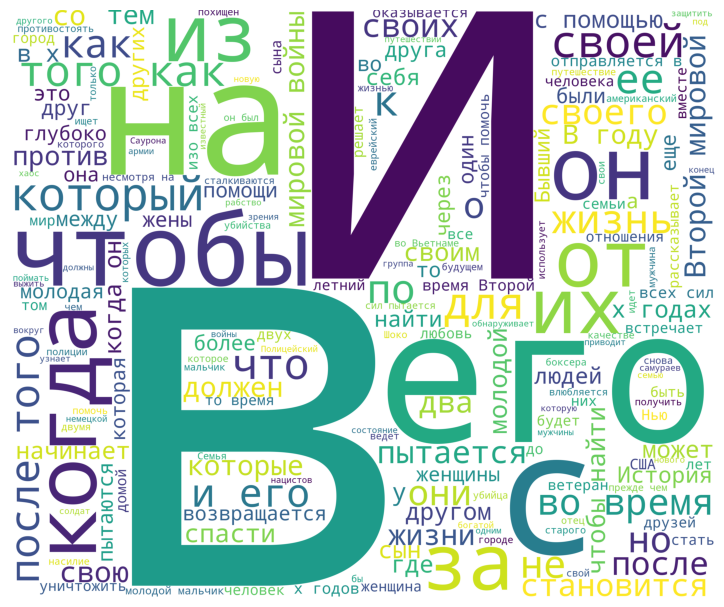

In [31]:
corpus = get_corpus(df['description'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

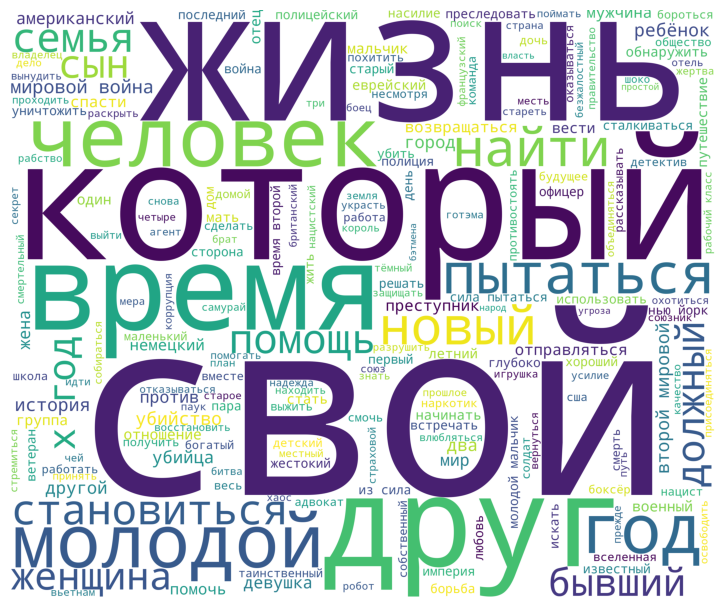

In [32]:
corpus = get_corpus(df['description_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# Векторизация текстовых данных

## TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [37]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_lemm'])

CPU times: total: 31.2 ms
Wall time: 32.9 ms


In [38]:
tfidf_matrix.shape

(250, 329)

In [39]:
print(tfidf_matrix)

  (0, 228)	0.5609971780776377
  (0, 153)	0.5366385402397056
  (0, 235)	0.36095022211117994
  (0, 25)	0.5167360839695784
  (1, 299)	0.6470474266006888
  (1, 105)	0.7624497542326485
  (2, 207)	0.30472328032089
  (2, 118)	0.2806814734914573
  (2, 206)	0.30472328032089
  (2, 34)	0.29149211924525265
  (2, 239)	0.2806814734914573
  (2, 77)	0.22252379984207846
  (2, 24)	0.30472328032089
  (2, 64)	0.29149211924525265
  (2, 157)	0.30472328032089
  (2, 318)	0.29149211924525265
  (2, 103)	0.2715412027433167
  (2, 311)	0.30472328032089
  (3, 184)	0.47258372218110806
  (3, 32)	0.5462610129761999
  (3, 42)	0.3286038323500388
  (3, 62)	0.3219583021493597
  (3, 90)	0.3097971840634697
  (3, 299)	0.41309999881382126
  (4, 169)	0.3047249039101122
  :	:
  (246, 239)	0.3301685564061107
  (247, 14)	0.36515427535962675
  (247, 160)	0.36515427535962675
  (247, 247)	0.3817290460506857
  (247, 129)	0.3401616186905958
  (247, 269)	0.3401616186905958
  (247, 308)	0.3136683350074554
  (247, 154)	0.2700084168577413

# Кластеризация на данных после TF-IDF

## Kmeans

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

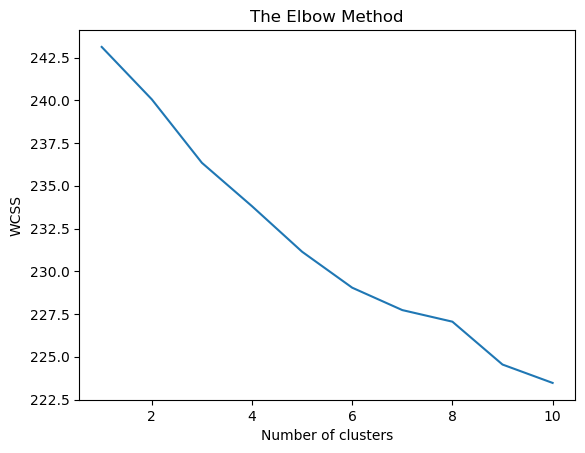

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10, random_state = 42)

In [45]:
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [46]:
pred=kmeans.fit_predict(tfidf_matrix)

cluster
1    81
5    39
6    33
0    31
4    29
3    22
2    15
Name: count, dtype: int64


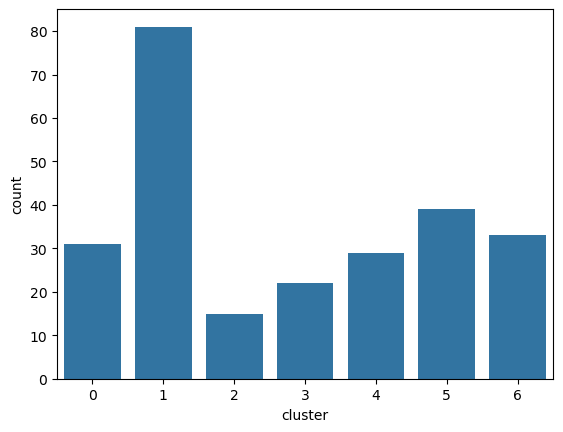

In [47]:
df['cluster'] = pred
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

In [48]:
df

name_film year_production duration  \
0         Побег из Шоушенка            1994   2h 22m   
1             Крестный отец            1972   2h 55m   
2             Тёмный рыцарь            2008   2h 32m   
3           Крестный отец 2            1974   3h 22m   
4    12 разгневанных мужчин            1957   1h 36m   
..                      ...             ...      ...   
245              День сурка            1993   1h 41m   
246                Прислуга            2011   2h 26m   
247             Сука любовь            2000   2h 34m   
248                 Ребекка            1940   2h 10m   
249               Видимость            2015   2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
1    Старение патриарха организованной криминальной...   
2    Когда угроза, известная как Джокер, наносит ущ...   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
..                                                 ...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   
247  Любительский боец ​​собаки, супермодель и забр...   
248  Самосознательная женщина жонглирует приспособл...   
249  Отчаянные меры принимаются человеком, который ...   

                                                genres  \
0              Epic, Period Drama, Prison Drama, Drama   
1                Epic, Gangster, Tragedy, Crime, Drama   
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
3                Epic, Gangster, Tragedy, Crime, Drama   
4       Legal Drama, Psychological Drama, Crime, Drama   
..                                                 ...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   
247                           Tragedy, Drama, Thriller   
248  Dark Romance, Psychological Drama, Psychologic...   
249                    Crime, Drama, Mystery, Thriller   

                         countries  \
0                    United States   
1                    United States   
2    United States, United Kingdom   
3                    United States   
4                    United States   
..                             ...   
245                  United States   
246           United States, India   
247                         Mexico   
248                  United States   
249                          India   

                                  modified_description  \
0    банкир осужденный уксорицид образует дружбу че...   
1    старение патриарха организованной криминальной...   
2    угроза известная джокер наносит ущерб хаос нар...   
3    ранняя жизнь карьера вито корлеоне х годах изо...   
4    присяжные суде делу убийстве нью йорке разочар...   
..                                                 ...   
245  нарциссический эгоистичный метеоролог оказывае...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки супермодель заброше...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком пытается ...   

                                      description_lemm  cluster  
0    банкир осудить уксорицид образовать дружба чет...        0  
1    старение патриарх организовать криминальный ди...        3  
2    угроза известный джокер наносить ущерб хаос на...        5  
3    ранний жизнь карьера вить корлеон х год изобра...        3  
4    присяжный суд дело убийство нью йорк разочаров...        1  
..                                                 ...      ...  
245  нарциссический эгоистичный метеоролог оказыват...        1  
246  начинающий автор время движение гражданский пр...        1  
247  любительский боец ​​собака супермодель заброси...        0  
248  самосознательный женщина жонглировать приспосо...        6  
249  отчаянный мера приниматься человек пытаться сп...        0  

[250

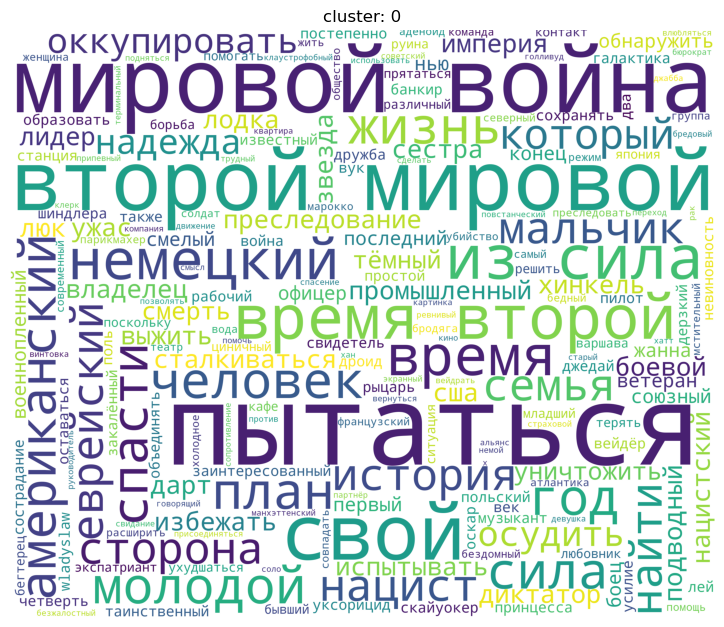

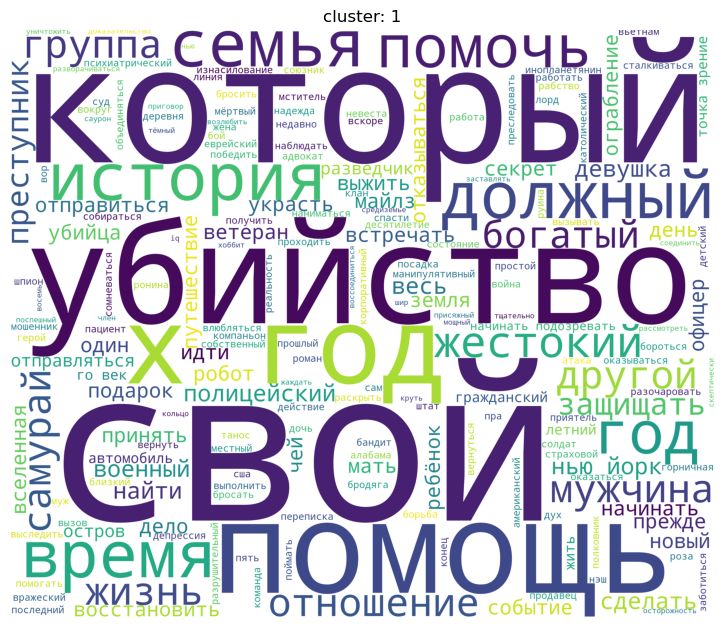

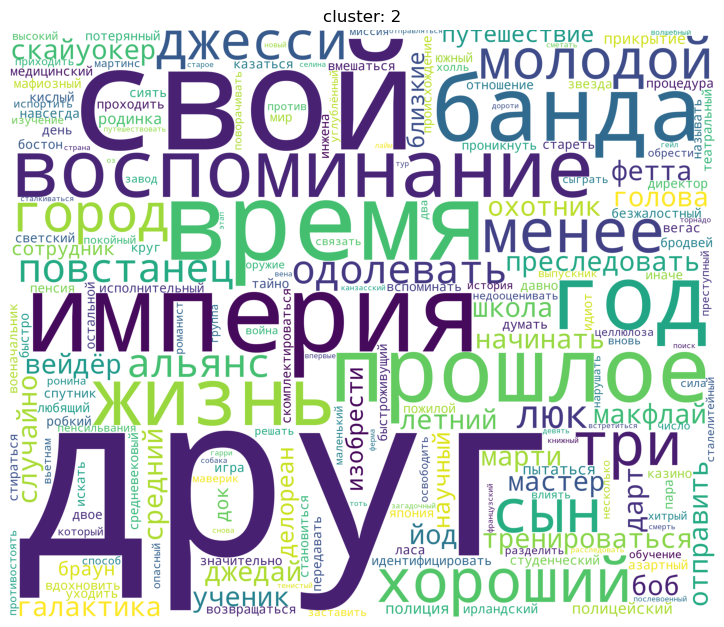

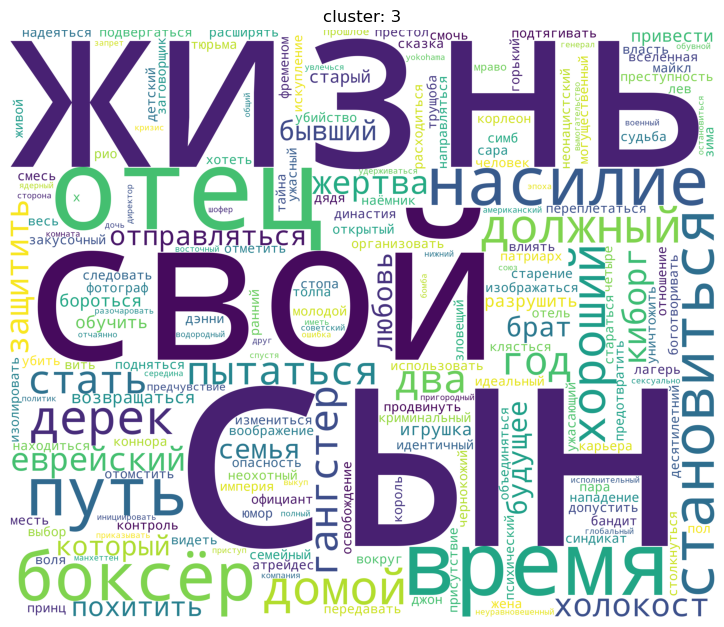

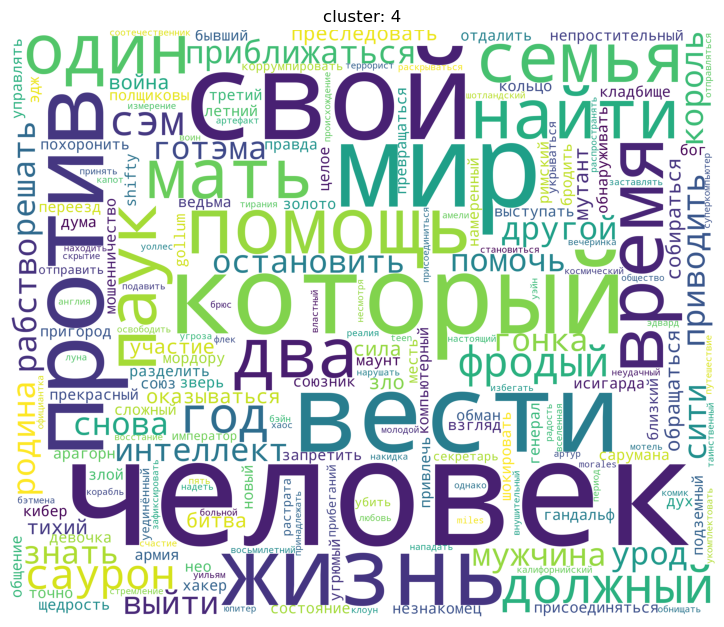

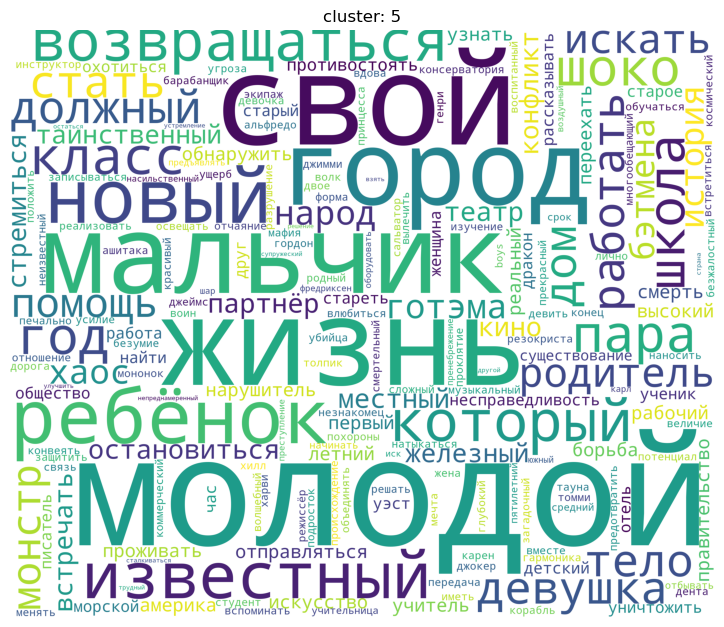

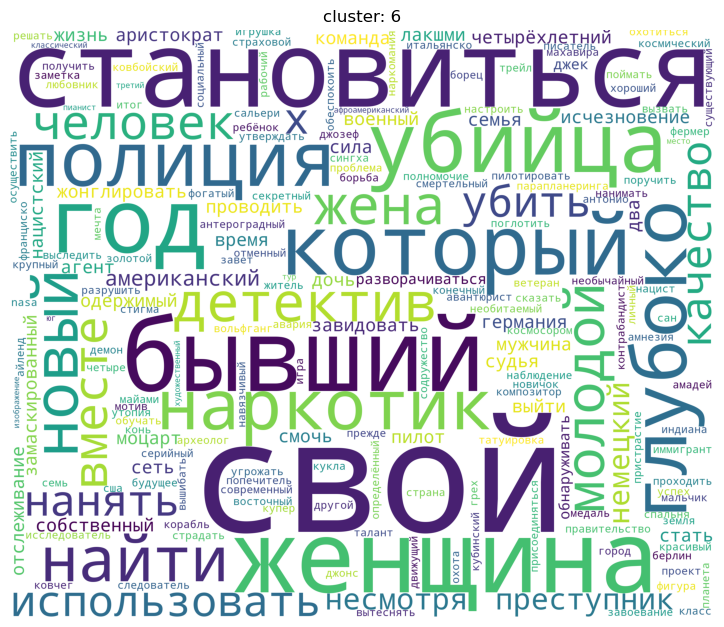

In [49]:
for i in sorted(df['cluster'].unique()):
    corpus = get_corpus(df[df['cluster'] == i].description_lemm.values)
    procWordCloud = get_wordCloud(corpus)
    
    fig = plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(procWordCloud)
    plt.axis('off')
    plt.title(f'cluster: {i}')
    plt.subplot(1, 2, 1)

# Тематическое моделирование

In [51]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [53]:
import gensim 
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [54]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [55]:
df['description_lemm_tokenize'] = [tokenize2(text) for text in df['description_lemm']]

In [56]:
df

name_film year_production duration  \
0         Побег из Шоушенка            1994   2h 22m   
1             Крестный отец            1972   2h 55m   
2             Тёмный рыцарь            2008   2h 32m   
3           Крестный отец 2            1974   3h 22m   
4    12 разгневанных мужчин            1957   1h 36m   
..                      ...             ...      ...   
245              День сурка            1993   1h 41m   
246                Прислуга            2011   2h 26m   
247             Сука любовь            2000   2h 34m   
248                 Ребекка            1940   2h 10m   
249               Видимость            2015   2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
1    Старение патриарха организованной криминальной...   
2    Когда угроза, известная как Джокер, наносит ущ...   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
..                                                 ...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   
247  Любительский боец ​​собаки, супермодель и забр...   
248  Самосознательная женщина жонглирует приспособл...   
249  Отчаянные меры принимаются человеком, который ...   

                                                genres  \
0              Epic, Period Drama, Prison Drama, Drama   
1                Epic, Gangster, Tragedy, Crime, Drama   
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
3                Epic, Gangster, Tragedy, Crime, Drama   
4       Legal Drama, Psychological Drama, Crime, Drama   
..                                                 ...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   
247                           Tragedy, Drama, Thriller   
248  Dark Romance, Psychological Drama, Psychologic...   
249                    Crime, Drama, Mystery, Thriller   

                         countries  \
0                    United States   
1                    United States   
2    United States, United Kingdom   
3                    United States   
4                    United States   
..                             ...   
245                  United States   
246           United States, India   
247                         Mexico   
248                  United States   
249                          India   

                                  modified_description  \
0    банкир осужденный уксорицид образует дружбу че...   
1    старение патриарха организованной криминальной...   
2    угроза известная джокер наносит ущерб хаос нар...   
3    ранняя жизнь карьера вито корлеоне х годах изо...   
4    присяжные суде делу убийстве нью йорке разочар...   
..                                                 ...   
245  нарциссический эгоистичный метеоролог оказывае...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки супермодель заброше...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком пытается ...   

                                      description_lemm  cluster  \
0    банкир осудить уксорицид образовать дружба чет...        0   
1    старение патриарх организовать криминальный ди...        3   
2    угроза известный джокер наносить ущерб хаос на...        5   
3    ранний жизнь карьера вить корлеон х год изобра...        3   
4    присяжный суд дело убийство нью йорк разочаров...        1   
..                                                 ...      ...   
245  нарциссический эгоистичный метеоролог оказыват...        1   
246  начинающий автор время движение гражданский пр...        1   
247  любительский боец ​​собака супермодель заброси...        0   
248  самосознательный женщина жонглировать приспосо...        6   
249  отчаянный мера приниматься человек пытаться сп...      

In [57]:
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['description_lemm_tokenize'])

    corpus = [gensim_dictionary.doc2bow(text) for text in df['description_lemm_tokenize']]

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    for tpl in lda_5.print_topics():
        print(tpl, end='\n\n')
    print()
    
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    pyLDAvis.enable_notebook()
    display(pyLDAvis.display(vis_5))

In [58]:
from sklearn.decomposition import TruncatedSVD

In [59]:
def lsa_model(df):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_lemm'])
    
    lsa_model = TruncatedSVD(n_components=5, random_state=0)
    lsa_model.fit(tfidf_matrix)
    
    for i, topic in enumerate(lsa_model.components_):
        print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

## Тематическое моделирование(до кластеризации)

In [61]:
print('LDA Model')
lda5_model(df)

LDA Model
(0, '0.009*"год" + 0.008*"время" + 0.007*"жизнь" + 0.006*"х" + 0.005*"пытаться" + 0.005*"становиться" + 0.004*"убийца" + 0.004*"семья" + 0.004*"несмотря" + 0.004*"молодой"')

(1, '0.008*"жизнь" + 0.007*"человек" + 0.007*"пытаться" + 0.007*"молодой" + 0.006*"год" + 0.005*"семья" + 0.004*"время" + 0.004*"мальчик" + 0.004*"друг" + 0.003*"сила"')

(2, '0.007*"молодой" + 0.006*"женщина" + 0.006*"время" + 0.006*"год" + 0.005*"найти" + 0.005*"жизнь" + 0.004*"война" + 0.004*"против" + 0.004*"город" + 0.004*"пытаться"')

(3, '0.008*"жизнь" + 0.008*"год" + 0.006*"ребёнок" + 0.005*"история" + 0.005*"девушка" + 0.004*"должный" + 0.004*"х" + 0.004*"помощь" + 0.003*"молодой" + 0.003*"убийца"')

(4, '0.014*"друг" + 0.005*"новый" + 0.005*"время" + 0.005*"жизнь" + 0.004*"жена" + 0.004*"летний" + 0.004*"человек" + 0.003*"сын" + 0.003*"становиться" + 0.003*"путешествие"')




In [62]:
print('LSA Model')
lsa_model(df)

LSA Model
Topic 0: жизнь, молодой, время, человек, год, друг, война, пытаться, мировой война, мировой
Topic 1: мировой война, мировой, война, второй мировой, второй мировой война, второй, время второй мировой, время второй, немецкий, время
Topic 2: друг, друг друг, империя, менее, сын, иметь, война, хороший друг, смерть, банда
Topic 3: год, пытаться, военный, сила, семья, время, американский, собственный, бывший, надежда
Topic 4: молодой, женщина, убийца, мальчик, молодой женщина, молодой мальчик, новый, союз, город, дом


## Тематическое моделирование(после кластеризации)

In [64]:
print('LDA Model\n' + '-' * 50)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'cluster: {cluster}\n')
    lda5_model(new_df)
    print('-' * 50)

LDA Model
--------------------------------------------------
cluster: 0

(0, '0.012*"пытаться" + 0.012*"год" + 0.012*"звезда" + 0.012*"припевный" + 0.012*"влюбляться" + 0.012*"сделать" + 0.012*"кино" + 0.012*"говорящий" + 0.012*"трудный" + 0.012*"переход"')

(1, '0.022*"пытаться" + 0.012*"сила" + 0.012*"осудить" + 0.012*"время" + 0.012*"сталкиваться" + 0.006*"спасти" + 0.006*"союзный" + 0.006*"военнопленный" + 0.006*"смелый" + 0.006*"оккупировать"')

(2, '0.027*"мировой" + 0.027*"война" + 0.023*"второй" + 0.019*"пытаться" + 0.016*"время" + 0.016*"американский" + 0.016*"человек" + 0.012*"история" + 0.012*"спасти" + 0.012*"немецкий"')

(3, '0.042*"пытаться" + 0.014*"сила" + 0.014*"время" + 0.014*"год" + 0.010*"сторона" + 0.010*"жанна" + 0.010*"нацист" + 0.010*"смерть" + 0.010*"еврейский" + 0.010*"хинкель"')

(4, '0.024*"война" + 0.024*"мировой" + 0.024*"второй" + 0.013*"время" + 0.013*"план" + 0.013*"сила" + 0.013*"жизнь" + 0.013*"нацистский" + 0.013*"подводный" + 0.013*"лодка"')




--------------------------------------------------
cluster: 1

(0, '0.010*"время" + 0.008*"подарок" + 0.005*"начинать" + 0.005*"жестокий" + 0.005*"подозревать" + 0.005*"отношение" + 0.005*"бороться" + 0.005*"атака" + 0.005*"полковник" + 0.005*"нэш"')

(1, '0.011*"убийство" + 0.009*"найти" + 0.009*"земля" + 0.006*"робот" + 0.006*"семья" + 0.006*"день" + 0.006*"самурай" + 0.006*"пра" + 0.006*"преследовать" + 0.006*"невеста"')

(2, '0.013*"помощь" + 0.008*"богатый" + 0.005*"начинать" + 0.005*"новый" + 0.005*"группа" + 0.005*"мужчина" + 0.005*"военный" + 0.005*"идти" + 0.005*"отказываться" + 0.005*"чей"')

(3, '0.014*"год" + 0.009*"х" + 0.007*"помочь" + 0.007*"секрет" + 0.007*"остров" + 0.005*"история" + 0.005*"девушка" + 0.005*"офицер" + 0.005*"разведчик" + 0.005*"отправляться"')

(4, '0.012*"год" + 0.010*"должный" + 0.007*"летний" + 0.005*"защищать" + 0.005*"преступник" + 0.005*"прежде" + 0.005*"нью" + 0.005*"йорк" + 0.005*"убийца" + 0.005*"принять"')




--------------------------------------------------
cluster: 2

(0, '0.005*"город" + 0.005*"друг" + 0.005*"решать" + 0.005*"против" + 0.005*"разделить" + 0.005*"хитрый" + 0.005*"преступный" + 0.005*"банда" + 0.005*"ронина" + 0.005*"сыграть"')

(1, '0.060*"друг" + 0.021*"джесси" + 0.021*"жизнь" + 0.012*"год" + 0.012*"впервые" + 0.012*"французский" + 0.012*"сталкиваться" + 0.012*"этап" + 0.012*"книжный" + 0.012*"тур"')

(2, '0.067*"друг" + 0.015*"банда" + 0.015*"город" + 0.008*"империя" + 0.008*"макфлай" + 0.008*"пенсия" + 0.008*"испортить" + 0.008*"вновь" + 0.008*"случайно" + 0.008*"сила"')

(3, '0.048*"друг" + 0.014*"воспоминание" + 0.014*"империя" + 0.014*"быстроживущий" + 0.014*"скомплектироваться" + 0.014*"ласа" + 0.014*"мафиозный" + 0.014*"игра" + 0.014*"происхождение" + 0.014*"директор"')

(4, '0.026*"время" + 0.026*"друг" + 0.014*"прошлое" + 0.014*"сын" + 0.014*"молодой" + 0.014*"хороший" + 0.014*"группа" + 0.014*"число" + 0.014*"высокий" + 0.014*"миссия"')




--------------------------------------------------
cluster: 3

(0, '0.035*"сын" + 0.015*"игрушка" + 0.015*"отец" + 0.015*"домой" + 0.008*"время" + 0.008*"становиться" + 0.008*"влиять" + 0.008*"использовать" + 0.008*"открытый" + 0.008*"энди"')

(1, '0.018*"путь" + 0.018*"пытаться" + 0.010*"похитить" + 0.010*"становиться" + 0.010*"жертва" + 0.010*"удерживаться" + 0.010*"шофер" + 0.010*"компания" + 0.010*"вымогательство" + 0.010*"ошибка"')

(2, '0.034*"жизнь" + 0.017*"сын" + 0.017*"хороший" + 0.017*"дерек" + 0.012*"боксёр" + 0.012*"время" + 0.012*"насилие" + 0.012*"отец" + 0.007*"пара" + 0.007*"закусочный"')

(3, '0.019*"жизнь" + 0.019*"киборг" + 0.019*"сын" + 0.010*"должный" + 0.010*"насилие" + 0.010*"разрушить" + 0.010*"защитить" + 0.010*"ламотт" + 0.010*"джейк" + 0.010*"ринг"')

(4, '0.013*"жизнь" + 0.012*"любовь" + 0.012*"отправляться" + 0.012*"привести" + 0.012*"сын" + 0.012*"робкий" + 0.012*"большой" + 0.012*"сидней" + 0.012*"риф" + 0.012*"доставить"')




--------------------------------------------------
cluster: 4

(0, '0.017*"человек" + 0.017*"король" + 0.009*"вести" + 0.009*"жизнь" + 0.009*"против" + 0.009*"интеллект" + 0.009*"обращаться" + 0.009*"урод" + 0.009*"родина" + 0.009*"собираться"')

(1, '0.036*"человек" + 0.010*"время" + 0.010*"мать" + 0.010*"помочь" + 0.010*"найти" + 0.010*"мир" + 0.010*"мужчина" + 0.010*"паук" + 0.010*"должный" + 0.005*"находить"')

(2, '0.018*"против" + 0.012*"семья" + 0.012*"вести" + 0.012*"оказываться" + 0.012*"мир" + 0.012*"снова" + 0.007*"рабство" + 0.007*"сила" + 0.007*"отправить" + 0.007*"убить"')

(3, '0.018*"вести" + 0.018*"жизнь" + 0.012*"помощь" + 0.012*"мутант" + 0.012*"человек" + 0.007*"гонка" + 0.007*"против" + 0.007*"год" + 0.007*"время" + 0.007*"должный"')

(4, '0.026*"мир" + 0.020*"человек" + 0.008*"шанс" + 0.008*"чемпион" + 0.008*"редкий" + 0.008*"пройти" + 0.008*"дистанция" + 0.008*"небольшой" + 0.008*"вес" + 0.008*"сразиться"')




--------------------------------------------------
cluster: 5

(0, '0.017*"молодой" + 0.017*"новый" + 0.017*"мальчик" + 0.012*"жизнь" + 0.012*"пара" + 0.012*"найти" + 0.012*"друг" + 0.012*"дракон" + 0.006*"дом" + 0.006*"конфликт"')

(1, '0.018*"молодой" + 0.014*"жизнь" + 0.009*"америка" + 0.009*"старый" + 0.009*"час" + 0.009*"город" + 0.009*"должный" + 0.009*"противостоять" + 0.009*"готэма" + 0.009*"бэтмена"')

(2, '0.016*"город" + 0.016*"молодой" + 0.011*"класс" + 0.011*"уэст" + 0.011*"известный" + 0.011*"мальчик" + 0.011*"помощь" + 0.011*"рабочий" + 0.006*"ребёнок" + 0.006*"несправедливость"')

(3, '0.025*"жизнь" + 0.020*"ребёнок" + 0.020*"шоко" + 0.015*"монстр" + 0.010*"девушка" + 0.010*"таинственный" + 0.010*"история" + 0.006*"класс" + 0.006*"помощь" + 0.006*"встречать"')

(4, '0.027*"молодой" + 0.016*"мальчик" + 0.016*"год" + 0.012*"школа" + 0.012*"новый" + 0.008*"возвращаться" + 0.008*"работать" + 0.008*"местный" + 0.008*"морской" + 0.008*"известный"')




--------------------------------------------------
cluster: 6

(0, '0.020*"женщина" + 0.014*"наркотик" + 0.014*"глубоко" + 0.014*"бывший" + 0.014*"джек" + 0.014*"замаскированный" + 0.014*"полиция" + 0.014*"лакшми" + 0.007*"дочь" + 0.007*"выйти"')

(1, '0.015*"год" + 0.015*"полиция" + 0.015*"найти" + 0.015*"глубоко" + 0.015*"жизнь" + 0.015*"моцарт" + 0.015*"смочь" + 0.015*"завидовать" + 0.008*"нанять" + 0.008*"агент"')

(2, '0.021*"становиться" + 0.014*"год" + 0.014*"американский" + 0.014*"использовать" + 0.014*"х" + 0.014*"собственный" + 0.008*"преступник" + 0.008*"сила" + 0.008*"убийца" + 0.008*"наркотик"')

(3, '0.018*"жена" + 0.013*"становиться" + 0.013*"вместе" + 0.013*"женщина" + 0.007*"молодой" + 0.007*"аристократ" + 0.007*"жонглировать" + 0.007*"мужчина" + 0.007*"проводить" + 0.007*"поезд"')

(4, '0.024*"бывший" + 0.016*"убийца" + 0.016*"женщина" + 0.012*"становиться" + 0.008*"новый" + 0.008*"немецкий" + 0.008*"молодой" + 0.008*"время" + 0.008*"отслеживание" + 0.008*"исчезновени

--------------------------------------------------


In [65]:
print('LSA Model\n' + '-' * 50)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'cluster: {cluster}\n')
    lsa_model(new_df)
    print('-' * 50)

LSA Model
--------------------------------------------------
cluster: 0

Topic 0: второй мировой, второй мировой война, мировой война, мировой, второй, война, время второй, время второй мировой, время, немецкий
Topic 1: пытаться, сила пытаться, сила, спасти, найти, пытаться найти, боец, люк, дарт, пытаться спасти
Topic 2: спасти, пытаться спасти, время, люк, дарт, человек, тёмный сторона, тёмный, семья, сторона
Topic 3: осудить, конец второй, конец, конец второй мировой, жизнь, история, надежда, пытаться найти, обнаружить, обнаружить терминальный
Topic 4: план, лидер, сша, выходить, наивный молодёжный лидер, заполнение, быстро сталкиваться, быстро сталкиваться коррупция, заполнение вакансия, заполнение вакансия сенат
--------------------------------------------------
cluster: 1

Topic 0: начинать, год, начинать подозревать, подозревать, нью, мужчина, защищать, преступник, весь, убийство
Topic 1: начинать, идти, подозревать, начинать подозревать, группа, преступник, ограбление, чей, выж

In [18]:
df_category_cluster = pd.DataFrame()

In [20]:
df_category_cluster['category'] = ['Войны', 'Подозрение', 'Хороший человек', 'Становление нового человек', 'Поиск ответа', 'Новый навык ребёнка', 'Детектив']

In [22]:
df_category_cluster

category
0                       Войны
1                  Подозрение
2             Хороший человек
3  Становление нового человек
4                Поиск ответа
5         Новый навык ребёнка
6                    Детектив

In [69]:
# Провести анализ: вывести каждый кластер, посмотреть соответствие для фильмов для каждого кластера

## Кластер: 0(Войны)

In [71]:
df[df['cluster'] == 0]

name_film year_production  \
0                                Побег из Шоушенка            1994   
6                                  Список Шиндлера            1993   
28                                  Звёздные войны            1977   
31                                         Пианист            2002   
36                               Могила светлячков            1988   
44                                      Касабланка            1942   
49                                   Новые времена            1936   
66                                Великий диктатор            1940   
69                              Бесславные ублюдки            2009   
78                                 Подводная лодка            1981   
89                               Поющие под дождем            1952   
90                                    Иди и смотри            1985   
93   Звёздные войны: Эпизод 6 - Возвращение Джедая            1983   
95                                            Жить            1952   
99                                        Квартира            1960   
101                             Лоуренс Аравийский            1962   
107                                 Гражданин Кейн            1941   
116                                 Крепкий орешек            1988   
119                                    Оппенгеймер            2023   
125                                         Бункер            2004   
140                           Парк юрского периода            1993   
156                                  Большой побег            1963   
170                           Мост через реку Квай            1957   
178                                    Гран Торино            2008   
191                        По соображениям совести            2016   
207                                        В порту            1954   
208                   Мистер Смит едет в Вашингтон            1939   
226                        Лучшие годы нашей жизни            1946   
229                            Страсти Жанны д'Арк            1928   
247                                    Сука любовь            2000   
249                                      Видимость            2015   

                                     duration  \
0                                      2h 22m   
6                                      3h 15m   
28                                      2h 1m   
31                                     2h 30m   
36                                     1h 28m   
44                                     1h 42m   
49                                     1h 27m   
66                                      2h 5m   
69                                     2h 33m   
78                                     2h 29m   
89                                     1h 43m   
90                                     2h 22m   
93                                     2h 11m   
95                                     2h 23m   
99                                      2h 5m   
101                                    3h 47m   
107                                    1h 59m   
116                                    2h 12m   
119  StarsCillian MurphyEmily BluntMatt Damon   
125                                    2h 36m   
140                                     2h 7m   
156                                    2h 52m   
170                                    2h 41m   
178                                    1h 56m   
191                                    2h 19m   
207                                    1h 48m   
208                                     2h 9m   
226                                    2h 50m   
229                                    1h 50m   
247                                    2h 34m   
249                                    2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
6    В оккупированной немецкой Поль году во время В...   
28   Люк Скайуокер объединяет усилия с рыцарем-джед...   

## Кластер: 1(Подозрение)

In [73]:
df[df['cluster'] == 1]

name_film year_production duration  \
4              12 разгневанных мужчин            1957   1h 36m   
8    Властелин колец: Братство кольца            2001   2h 58m   
10                       Форрест Гамп            1994   2h 22m   
12                    Бойцовский клуб            1999   2h 19m   
13                             Начало            2010   2h 28m   
..                                ...             ...      ...   
241                    Битва за Алжир            1966    2h 1m   
243                     Гроздья гнева            1940    2h 9m   
244                  В диких условиях            2007   2h 28m   
245                        День сурка            1993   1h 41m   
246                          Прислуга            2011   2h 26m   

                                           description  \
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
8    Крутый хоббит из Шира и восемь компаньонов отп...   
10   История Соединенных Штатов с 1950 -х годов до ...   
12   Офисный работник бессонницы и производитель мы...   
13   Вор, который крадет корпоративные секреты благ...   
..                                                 ...   
241  В 1950 -х годах страх и насилие растут, когда ...   
243  Семья штата Оклахома, изгнанная с фермы по бед...   
244  После окончания Университета Эмори ведущий сту...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   

                                                genres  \
4       Legal Drama, Psychological Drama, Crime, Drama   
8    Action Epic, Adventure Epic, Dark Fantasy, Epi...   
10                                Epic, Drama, Romance   
12   Psychological Drama, Psychological Thriller, W...   
13   Action Epic, Adventure Epic, Epic, Psychologic...   
..                                                 ...   
241             Docudrama, Political Drama, Drama, War   
243                       Period Drama, Tragedy, Drama   
244  Coming-of-Age, Docudrama, Road Trip, Survival,...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   

                                      countries  \
4                                 United States   
8    New Zealand, United States, United Kingdom   
10                                United States   
12                       Germany, United States   
13                United States, United Kingdom   
..                                          ...   
241                              Italy, Algeria   
243                               United States   
244                               United States   
245                               United States   
246                        United States, India   

                                  modified_description  \
4    присяжные суде делу убийстве нью йорке разочар...   
8    крутый хоббит шира восемь компаньонов отправил...   
10   история соединенных штатов х годов х годов раз...   
12   офисный работник бессонницы производитель мыль...   
13   вор крадет корпоративные секреты благодаря исп...   
..                                                 ...   
241  х годах страх насилие растут народ алжира борю...   
243  семья штата оклахома изгнанная фермы бедности ...   
244  окончания университета эмори ведущий студент с...   
245  нарциссический эгоистичный метеоролог оказывае...   
246  начинающий автор время движения гражданские пр...   

                                      description_lemm  cluster  \
4    присяжный суд дело убийство нью йорк разочаров...        1   
8    круть хоббит шир восемь компаньон отправиться ...        1   
10   история соединить штат х год х год разворачива...        1   
12   офисный работник бессонница производитель мыль...        1   
13   вор красть корпоративный секрет благодаря испо...        1   
..                                                 ...      ...   
241  х год страх насилие расти народ алжир бороться...        

## Кластер: 2(Хороший человек)

In [75]:
df[df['cluster'] == 2]

name_film year_production  \
14   Звёздные войны: Эпизод 5 - Империя наносит отв...            1980   
29                                     Назад в будущее            1985   
37                                          Отступники            2006   
84                                          Три идиота            2009   
96                        Вечное сияние чистого разума            2004   
139                                          Всё о Еве            1950   
142                                             Казино            1995   
144                                                Ран            1985   
145                                   Топ Ган. Мэверик            2022   
154                                      Телохранитель            1961   
203                                  Охотник на оленей            1978   
213                                     Третий человек            1949   
227                                      Перед закатом            2004   
230                                Волшебник страны Оз            1939   
234                                              Гонка            2013   

    duration                                        description  \
14     2h 4m  После того, как Империя одолевает альянс повст...   
29    1h 56m  Марти МакФлай, 17-летний ученик средней школы,...   
37    2h 31m  Полицейский под прикрытием и родинка в полиции...   
84    2h 50m  Двое друзей ищут своего давно потерянного спут...   
96    1h 48m  Когда их отношения становятся кислыми, пара пр...   
139   2h 18m  Казалось бы, робкая, но тайно безжалостная Инж...   
142   2h 58m  В Лас-Вегасе два лучших друзья-исполнительный ...   
144   2h 40m  В средневековой Японии пожилой военачальник ух...   
145   2h 10m  История связана с тем, что Маверик противостои...   
154   1h 50m  Хитрый Ронин приходит в город, разделенный дву...   
203    3h 3m  Углубленное изучение способов, которыми война ...   
213   1h 44m  Романист из целлюлозы Холли Мартинс путешеству...   
227   1h 20m  Через девять лет после того, как Джесси и Сели...   
230   1h 42m  Молодая Дороти Гейл и ее собака Тото сметают т...   
234    2h 3m  Джеймс Хант и Ники Лауда, два чрезвычайно опыт...   

                                                genres  \
14   Action Epic, Adventure Epic, Dark Fantasy, Dys...   
29   High-Concept Comedy, Teen Adventure, Teen Come...   
37   Cop Drama, Epic, Gangster, Crime, Drama, Thriller   
84   Buddy Comedy, Coming-of-Age, Quirky Comedy, Co...   
96   Dark Romance, Psychological Drama, Drama, Roma...   
139                               Showbiz Drama, Drama   
142  Docudrama, Epic, Gangster, True Crime, Crime, ...   
144  Epic, Samurai, Tragedy, War Epic, Action, Dram...   
145                   Action Epic, Epic, Action, Drama   
154  One-Person Army Action, Period Drama, Samurai,...   
203                         Epic, War Epic, Drama, War   
213  Film Noir, Hard-boiled Detective, Whodunnit, D...   
227                  Feel-Good Romance, Drama, Romance   
230  Adventure Epic, Classic Musical, Fairy Tale, F...   
234  Docudrama, Motorsport, Period Drama, Biography...   

                         countries  \
14                   United States   
29                   United States   
37        United States, Hong Kong   
84                           India   
96                   United States   
139                  United States   
142          United States, France   
144                  Japan, France   
145                  United States   
154                          Japan   
203  United States, United Kingdom   
213                 United Kingdom   
227          France, United States   
230                  United States   
234  United Kingdom, United States   

                                  modified_description  \
14   империя одолевает альянс повстанцев люк скайуо...   
29   марти макфлай летний ученик средней школы случ...   
37   полицейский прикрытием родинка полиции пытаютс...   
84   двое друзей 

## Кластер: 3(Становление нового человек)

In [77]:
df[df['cluster'] == 3]

name_film year_production  \
1                                        Крестный отец            1972   
3                                      Крестный отец 2            1974   
7                                   Криминальное чтиво            1994   
24                                          Город Бога            2002   
26                                     Жизнь прекрасна            1997   
27                           Терминатор 2: Судный день            1991   
35                                          Король Лев            1994   
40                            Американская история Икс            1998   
55                                  Дюна: Часть вторая            2024   
65                                              Сияние            1980   
77   Доктор Стрейнджлав, или Как я научился не волн...            1964   
79                              Красота по-американски            1999   
83                                            Рай и ад            1963   
87                                   Однажды в Америке            1984   
92                      История игрушек: Большой побег            2010   
94                                               Охота            2012   
124                             Похитители велосипедов            1948   
155                                     В поисках Немо            2003   
173                                        Бешеный бык            1980   
176                                               Воин            2011   
179                                 Малышка на миллион            2004   
196                                        Во имя отца            1993   

    duration                                        description  \
1     2h 55m  Старение патриарха организованной криминальной...   
3     3h 22m  Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
7     2h 34m  Жизнь двух наемников толпы, боксера, гангстера...   
24    2h 10m  В трущобах Рио два детских путях расходятся, к...   
26    1h 56m  Когда открытый еврейский официант и его сын ст...   
27    2h 17m  Киборг, идентичный тем, кто не смог убить Сару...   
35    1h 28m  Принц Лев Симба и его отец подвергаются нападе...   
40    1h 59m  Живая жизнью, отмеченная насилием, Неонацистск...   
55    2h 46m  Пол Атрейдес объединяется с Фременом, находясь...   
65    2h 26m  Семья направляется в изолированный отель на зи...   
77    1h 35m  Мраво неуравновешенная американская общая прик...   
79     2h 2m  Сексуально разочарованный пригородный отец име...   
83    2h 23m  Исполнительный директор обувной компании Yokoh...   
87    3h 49m  Бывший еврейский гангстер эпохи запрета возвра...   
92    1h 43m  Игрушки ошибочно доставляются в дневной центр ...   
94    1h 55m  Учитель живет одинокой жизнью, все время боряс...   
124   1h 29m  В послевоенной Италии похищен велосипед рабоче...   
155   1h 40m  После того, как его сын запечатлен в Большом Б...   
173    2h 9m  Жизнь боксера Джейка Ламотты, чье насилие и ха...   
176   2h 20m  Младший сын бывшего боксера -алкоголика возвра...   
179   2h 12m  Фрэнки, злоупотребленный старым тренером, неох...   
196   2h 13m  Принудительное признание ирландского мужчины к...   

                                                genres  \
1                Epic, Gangster, Tragedy, Crime, Drama   
3                Epic, Gangster, Tragedy, Crime, Drama   
7      Dark Comedy, Drug Crime, Gangster, Crime, Drama   
24        Caper, Coming-of-Age, Gangster, Crime, Drama   
26   Period Drama, Romantic Comedy, Tragedy, Tragic...   
27   Action Epic, Artificial Intelligence, Cyberpun...   
35   Animal Adventure, Coming-of-Age, Hand-Drawn An...   
40                 Prison Drama, Tragedy, Crime, Drama   
55   Action Epic, Desert Adventure, Epic, Sci-Fi Ep...   
65   Dark Comedy, Psychological Drama, Psychologica...   
77   Dark Comedy, Farce, Political Drama, Satire, T...   
79                 Psychological Drama, Tragedy, Drama   
83   Police Procedural, Crime, Drama, Mystery,

## Кластер: 4(Поиск ответа)

In [79]:
df[df['cluster'] == 4]

name_film year_production  \
5          Властелин колец: Возвращение короля            2003   
9                        Хороший, плохой, злой            1966   
11               Властелин колец: Две крепости            2002   
15                                     Матрица            1999   
30                        Унесённые призраками            2001   
32                                   Гладиатор            2000   
34                                       Психо            1960   
62               Человек-паук: Через Вселенные            2018   
70          Тёмный рыцарь: Возрождение легенды            2012   
80                              Храброе сердце            1995   
86                                      Джокер            2019   
97               2001 год: Космическая одиссея            1968   
111                                      Амели            2001   
118  Индиана Джонс и последний крестовый поход            1989   
122                                       1917            2019   
148                             Лабиринт Фавна            2006   
159                               Человек-слон            1980   
166                  Карты, деньги, два ствола            1998   
177       Гарри Поттер и Дары смерти: Часть II            2011   
181               Безумный Макс: Дорога ярости            2015   
183               Человек-паук: Нет пути домой            2021   
187                             12 лет рабства            2013   
199                              Дикие истории            2014   
211                                      Логан            2017   
212                                      Рокки            1976   
220                                    Комната            2015   
223                          Да прольётся свет            2021   
225                                      Взвод            1986   
232                               Суперсемейка            2004   

                                              duration  \
5                                               3h 21m   
9                                               2h 41m   
11                                              2h 59m   
15                                              2h 16m   
30                                               2h 4m   
32                                              2h 35m   
34                                              1h 49m   
62                                              1h 57m   
70                                              2h 44m   
80                                              2h 58m   
86                                               2h 2m   
97                                              2h 29m   
111                                              2h 2m   
118                                              2h 7m   
122                                             1h 59m   
148                                             1h 58m   
159                                              2h 4m   
166                                             1h 47m   
177                                             2h 10m   
181        StarsTom HardyCharlize TheronNicholas Hoult   
183                                             2h 28m   
187                                             2h 14m   
199                                              2h 2m   
211                                             2h 17m   
212  TriviaAfter producers Irwin Winkler and Robert...   
220                                             1h 58m   
223                                             2h 44m   
225         StarsCharlie SheenTom BerengerWillem Dafoe   
232                                             1h 55m   

                                           description  \
5    Гандальф и Арагорн ведут мир людей против арми...   
9    Мошенничество на щедрости присоединяется к дву...   
11   В то время как Фродо и Сэм Эдж ближе к Мордору...   
15   Когда прекрасный незнакомец приводит компьютер...   
30   Во время переезда св

## Кластер: 5(Новый навык ребёнка)

In [ ]:
Описание данного кластера похоже на правду

In [81]:
df[df['cluster'] == 5]

name_film year_production  \
2                             Тёмный рыцарь            2008   
16                            Славные парни            1990   
38                              Одержимость            2014   
47               Новый кинотеатр «Парадизо»            1988   
48                                    Чужой            1979   
51                  Однажды на Диком Западе            1968   
81                       Принцесса Мононоке            1997   
82                                 Твоё имя            2016   
85   Boзмутительный класс не прошёл экзамен            1975   
88                                Капернаум            2018   
106                                   Вверх            2009   
112                   Развод Надера и Симин            2011   
115                      Звёздочки на земле            2007   
120                              Метрополис            1927   
127                       Волк с Уолл-стрит            2013   
129                               Гамильтон            2020   
131                          Бэтмен: Начало            2005   
143                          Шестое чувство            1999   
149                             Непрощенный            1992   
157                           Ходячий замок            2004   
167                     «V» значит Вендетта            2005   
168                             Головоломка            2015   
185                 Общество мёртвых поэтов            1989   
186                              Дети небес            1997   
189                  Отель «Гранд Будапешт»            2014   
194                                 Рататуй            2007   
195                     Корпорация монстров            2001   
197                   Как приручить дракона            2010   
200                                 Челюсти            1975   
201                          Шерлок младший            1924   
210                      Земляничная поляна            1957   
214                       Токийская повесть            1953   
219                          Седьмая печать            1957   
222                               Ненависть            1995   
228                      Изгоняющий дьявола            1973   
231                            Звуки музыки            1965   
235                        Останься со мной            1986   
238                         Стальной гигант            1999   
242                            Форма голоса            2016   

                                              duration  \
2                                               2h 32m   
16                                              2h 25m   
38                                              1h 46m   
47                                              2h 54m   
48                                              1h 57m   
51                                              2h 46m   
81                                              2h 13m   
82                                              1h 46m   
85                                              1h 35m   
88                                               2h 6m   
106                                             1h 36m   
112                                              2h 3m   
115                                             2h 42m   
120                                             2h 33m   
127                               Agent Patrick Denham   
129                                             2h 40m   
131                                             2h 20m   
143                                             1h 47m   
149                                             2h 10m   
157                                             1h 59m   
167                                             2h 12m   
168                                             1h 35m   
185                                              2h 8m   
186                                             1h 29m   
189                                             1h 39m   
194  

## Кластер: 6(Детектив)

Описание данного кластера не совсем подходит, лучше его назвать "Поиск истины"

In [83]:
df[df['cluster'] == 6]

name_film year_production  \
17                                        Интерстеллар            2014   
19                                                Семь            1995   
46                                                 1+1            2011   
56                                               Помни            2000   
58        Индиана Джонс: В поисках утраченного ковчега            1981   
59                                        Жизнь других            2006   
72                                              Амадей            1984   
73                                     История игрушек            1995   
91                                    Реквием по мечте            2000   
102                                     Лицо со шрамом            1983   
108                                           М убийца            1931   
110                                     Головокружение            1958   
126                                Дангал. Слово борца            2016   
130                                      Зеленая книга            2018   
133                               Нюрнбергский процесс            1961   
135                             В джазе только девушки            1959   
146                              Старикам тут не место            2007   
151                               Убить Билла. Фильм 1            2003   
153                                           Пленницы            2013   
164                                  Китайский квартал            1974   
171                                            На игле            1996   
172                          Поймай меня, если сможешь            2002   
188                                    Перед рассветом            1995   
192                                        Исчезнувшая            2014   
193                           Воспоминания об убийстве            2003   
209                                    Я все еще здесь            2024   
217                                          Махараджа            2024   
218                                         Терминатор            1984   
221  Пираты Карибского моря: Проклятие Чёрной жемчу...            2003   
233                          Хатико: самый верный друг            2009   
237                                           Телесеть            1976   
240                                   Быть или не быть            1942   
248                                            Ребекка            1940   

    duration                                        description  \
17    2h 49m  Когда в будущем Земля станет необитаемой, ферм...   
19     2h 7m  Два детектива, новичок и ветеран, охотятся на ...   
46    1h 52m  После того, как он становится четырехлетним из...   
56    1h 53m  Бывший страховой следователь, который сейчас с...   
58    1h 55m  В 1936 году археологи и авантюристы правительс...   
59    2h 17m  В 1984 году в Восточном Берлине агент секретно...   
72    2h 40m  Жизнь, успех и проблемы Вольфганг Амадея Моцар...   
73    1h 21m  Ковбойская кукла глубоко угрожает и завидует, ...   
91    1h 42m  Утопии, вызванные наркотиками четырех жителей ...   
102   2h 50m  В 1980-х годах определенный кубинский иммигран...   
108   1h 57m  Когда полиция в немецком городе не может пойма...   
110    2h 8m  Бывший детектив полиции Сан -Франциско жонглир...   
126   2h 41m  Махавир Сингх Фогат, бывший борец, решает осущ...   
130   2h 10m  Итальянско-американский вышибала рабочего клас...   
133   2h 59m  Художественное изображение судей 1947 года, тр...   
135    2h 1m  После того, как два музыканта-мужчины стали св...   
146    2h 2m  Насилие и хаос заступают после того, как охотн...   
151   1h 51m  Проснувшись от четырехлетней комы, бывший убий...   
153   2h 33m  Отчаянный отец берет закон в свои руки после т...   
164   2h 10m  Частный детектив, нанятый для разоблачения пре...   
171   1h 33m  Рентон, глубоко погруженный на сцену наркотико...   
172   2h 21m  Еще 17 еще 17, Фрэнк - опытный фальсифик

### Сохранение данных

In [85]:
file_name = 'top_250_films.csv'
df.to_csv(file_name)

In [1]:
# Обучить классификацию и выбрать лучшею
# сохранить лучшею модель классификации

## Классификация

In [342]:
df = pd.read_csv('top_250_films.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

name_film  year_production duration  \
0         Побег из Шоушенка             1994   2h 22m   
1             Крестный отец             1972   2h 55m   
2             Тёмный рыцарь             2008   2h 32m   
3           Крестный отец 2             1974   3h 22m   
4    12 разгневанных мужчин             1957   1h 36m   
..                      ...              ...      ...   
245              День сурка             1993   1h 41m   
246                Прислуга             2011   2h 26m   
247             Сука любовь             2000   2h 34m   
248                 Ребекка             1940   2h 10m   
249               Видимость             2015   2h 43m   

                                           description  \
0    Банкир, осужденный за уксорицид, образует друж...   
1    Старение патриарха организованной криминальной...   
2    Когда угроза, известная как Джокер, наносит ущ...   
3    Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...   
4    Присяжные в суде по делу об убийстве в Нью -Йо...   
..                                                 ...   
245  Нарциссический, эгоистичный метеоролог оказыва...   
246  Начинающий автор во время движения за гражданс...   
247  Любительский боец ​​собаки, супермодель и забр...   
248  Самосознательная женщина жонглирует приспособл...   
249  Отчаянные меры принимаются человеком, который ...   

                                                genres  \
0              Epic, Period Drama, Prison Drama, Drama   
1                Epic, Gangster, Tragedy, Crime, Drama   
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
3                Epic, Gangster, Tragedy, Crime, Drama   
4       Legal Drama, Psychological Drama, Crime, Drama   
..                                                 ...   
245  Feel-Good Romance, High-Concept Comedy, Holida...   
246                                Period Drama, Drama   
247                           Tragedy, Drama, Thriller   
248  Dark Romance, Psychological Drama, Psychologic...   
249                    Crime, Drama, Mystery, Thriller   

                         countries  \
0                    United States   
1                    United States   
2    United States, United Kingdom   
3                    United States   
4                    United States   
..                             ...   
245                  United States   
246           United States, India   
247                         Mexico   
248                  United States   
249                          India   

                                  modified_description  \
0    банкир осужденный уксорицид образует дружбу че...   
1    старение патриарха организованной криминальной...   
2    угроза известная джокер наносит ущерб хаос нар...   
3    ранняя жизнь карьера вито корлеоне х годах изо...   
4    присяжные суде делу убийстве нью йорке разочар...   
..                                                 ...   
245  нарциссический эгоистичный метеоролог оказывае...   
246  начинающий автор время движения гражданские пр...   
247  любительский боец ​​собаки супермодель заброше...   
248  самосознательная женщина жонглирует приспособл...   
249  отчаянные меры принимаются человеком пытается ...   

                                      description_lemm  cluster  \
0    банкир осудить уксорицид образовать дружба чет...        0   
1    старение патриарх организовать криминальный ди...        3   
2    угроза известный джокер наносить ущерб хаос на...        5   
3    ранний жизнь карьера вить корлеон х год изобра...        3   
4    присяжный суд дело убийство нью йорк разочаров...        1   
..                                                 ...      ...   
245  нарциссический эгоистичный метеоролог оказыват...        1   
246  начинающий автор время движение гражданский пр...        1   
247  любительский боец ​​собака супермодель заброси...        0   
248  самосознательный женщина жонглировать приспосо...        6   
249  отчаянный мера приниматься человек пытаться

In [402]:
# lst_data = {'year_production' : [], 'lst_tfidf' : [], 'cluster' : []}
lst_data = {'year_production' : [], 'id_word' : [], 'koeff' : [], 'cluster' : []}

In [404]:
russian_stopwords = stopwords.words("russian") 

In [414]:
from sklearn.feature_extraction.text import TfidfVectorizer
def create_list_tdidf(df, column):
    tfidf_vectorizer = TfidfVectorizer()
    return tfidf_vectorizer.fit_transform(df[column])

In [416]:
print(create_list_tdidf(df.iloc[:1], 'description_lemm'))

  (0, 11)	0.23570226039551587
  (0, 9)	0.23570226039551587
  (0, 4)	0.23570226039551587
  (0, 7)	0.23570226039551587
  (0, 10)	0.23570226039551587
  (0, 5)	0.23570226039551587
  (0, 12)	0.23570226039551587
  (0, 3)	0.23570226039551587
  (0, 1)	0.23570226039551587
  (0, 14)	0.23570226039551587
  (0, 2)	0.23570226039551587
  (0, 6)	0.23570226039551587
  (0, 13)	0.23570226039551587
  (0, 8)	0.47140452079103173
  (0, 0)	0.23570226039551587


In [350]:
for i in range(df.shape[0]):
    tf_idf = create_list_tdidf(pd.DataFrame(data=[{'description_lemm': df.iloc[i].description_lemm}]), 'description_lemm')
    lst_data['year_production'].append(df.iloc[i].year_production)
    lst_data['id_word'].append(tf_idf[0])
    lst_data['koeff'].append(tf_idf[1])
    lst_data['cluster'].append(df.iloc[i].cluster)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [320]:
new_df = pd.DataFrame(data=lst_data)
new_df

year_production   id_word     koeff  cluster
0               1994  0.235702  0.235702        0
1               1972  0.301511  0.301511        3
2               2008  0.229416  0.229416        5
3               1974  0.242536  0.242536        3
4               1957  0.223607  0.223607        1
..               ...       ...       ...      ...
245             1993  0.353553  0.353553        1
246             2011  0.179605  0.179605        1
247             2000  0.235702  0.235702        0
248             1940  0.242536  0.485071        6
249             2015  0.277350  0.277350        0

[250 rows x 4 columns]

In [273]:
X = new_df.drop('cluster', axis=1)

In [275]:
y = new_df['cluster']

In [277]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [279]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(167, 2) (83, 2) (167,) (83,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [286]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [252]:
knn_pred_test = knn.predict(X_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred_test))

In [255]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, knn_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'sns' is not defined

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X, y)

In [ ]:
gnb_pred_test = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, gnb_pred_test))

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, gnb_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier (Классификатор дерева решений)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Модель, которая показала себя достойней всего - 

## Сохранение модели классификации

In [76]:
from joblib import dump

In [ ]:
dump(, 'models/best_model_250_films.joblib')